In [43]:
import pandas as pd

In [44]:
ESD_project = pd.read_csv(r"C:\Users\user\Downloads\Ecommerce_Sales_Data_2024_2025.csv")

In [45]:
# Load and clean dataset.

df = pd.DataFrame(ESD_project)
df.head()


,Order_ID,Order_Date,Customer_Name,Region,City,Category,Sub_Category,Product_Name,Quantity,Unit_Price,Discount,Sales,Profit,Payment_Mode
0,10001,10/19/2024,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,8/30/2025,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,11/4/2023,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,5/23/2025,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,1/19/2025,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


In [46]:
# Load and clean dataset.

''' Check the missing value '''
print("\nMissing values:")
print(df.isnull().sum())

''' Remove duplicates '''
df.drop_duplicates(inplace=True)


Missing values:
Order_ID         0
Order_Date       0
Customer_Name    0
Region           0
City             0
Category         0
Sub_Category     0
Product_Name     0
Quantity         0
Unit_Price       0
Discount         0
Sales            0
Profit           0
Payment_Mode     0
dtype: int64


In [47]:
# Seasonal sales trends.

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
def get_season(month):
    if month in [11,12,1,2]:
        return "Winter"
    elif month in [3,4,5,6]:
        return "Summer"
    elif month in [7,8,9,10]:
        return "Monsoon"
    else:
        return "No Season"

df['season'] = df['Order_Date'].dt.month.apply(get_season)
df['Sales'] = pd.to_numeric(df['Sales'],errors='coerce')
seasonal_sales = df.groupby('season')
df[['Sales']].sum().sort_values(ascending=False)
print(seasonal_sales)

In [48]:
# Group sales by customer

df.groupby('Customer_Name')['Sales'].sum().reset_index()


,Customer_Name,Sales
0,Aaina Balasubramanian,158876.80
1,Aaina Bhargava,26411.90
2,Aaina Bir,231044.00
3,Aaina Chander,350240.00
4,Aaina Chandran,43747.50
...,...,...
4839,Zoya Loyal,237588.00
4840,Zoya Ranganathan,65364.30
4841,Zoya Reddy,79619.50
4842,Zoya Sami,167884.95


In [49]:
# Group sales by product

df.groupby('Product_Name')['Sales'].sum().reset_index()


,Product_Name,Sales
0,Accessories Alias,242285.50
1,Accessories Aliquid,10808.00
2,Accessories Animi,122584.45
3,Accessories Architecto,76115.90
4,Accessories Aspernatur,114370.50
...,...,...
3830,Yoga Mat Vel,46036.00
3831,Yoga Mat Velit,76190.60
3832,Yoga Mat Vero,96600.60
3833,Yoga Mat Voluptate,284205.80


In [50]:
# Group sales by category.

df.groupby('Category')['Sales'].sum().reset_index()


,Category,Sales
0,Beauty,50803409.70
1,Books,54932643.00
2,Clothing,55053908.30
3,Electronics,52587883.95
4,Furniture,56647187.90
5,Groceries,47883103.15
6,Home Decor,57233222.35
7,Kitchen,54227902.30
8,Sports,52069397.25
9,Toys,52227366.45


In [51]:
# Calculate ARPU and customer lifetime value.

ARPU = df['Sales'].sum()/df['Customer_Name'].nunique()

'''Total revenue per customer'''
customer_revenue = df.groupby('Customer_Name')['Sales'].sum()

'''Average order frequency per customer'''
customer_orders = df.groupby('Customer_Name')['Order_ID'].nunique()

'''Average profit margin per customer'''
customer_profit = df.groupby('Customer_Name')['Profit'].sum()

'''Customer Lifetime Value'''
CLV = pd.DataFrame({
    'Total_revenue':customer_revenue,
    'Orders':customer_orders,
    'Profit':customer_profit
})

CLV['CLV'] = CLV['Profit']

In [52]:
# Identify frequent product combinations.

basket = df.groupby('Order_ID')['Product_Name'].apply(list)

from itertools import combinations
from collections import Counter

combo_counter = Counter()

for Products in basket:
    combos = combinations(sorted(Products),2)
    combo_counter.update(combos)
    
combo_df = pd.DataFrame(combo_counter.items(),columns=['Product_Pair','Count'])

top_combos = combo_df.sort_values('Count',ascending=False).head(10)
print(top_combos)


Empty DataFrame
Columns: [Product_Pair, Count]
Index: []


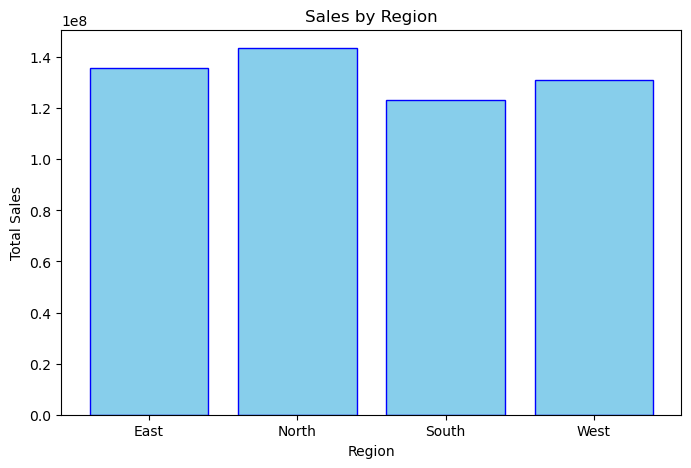

In [53]:
# Geographic sales trends analysis.

# By Region

import matplotlib.pyplot as plt

region_sales = df.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(region_sales['Region'],region_sales['Sales'],color='skyblue',edgecolor='blue')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


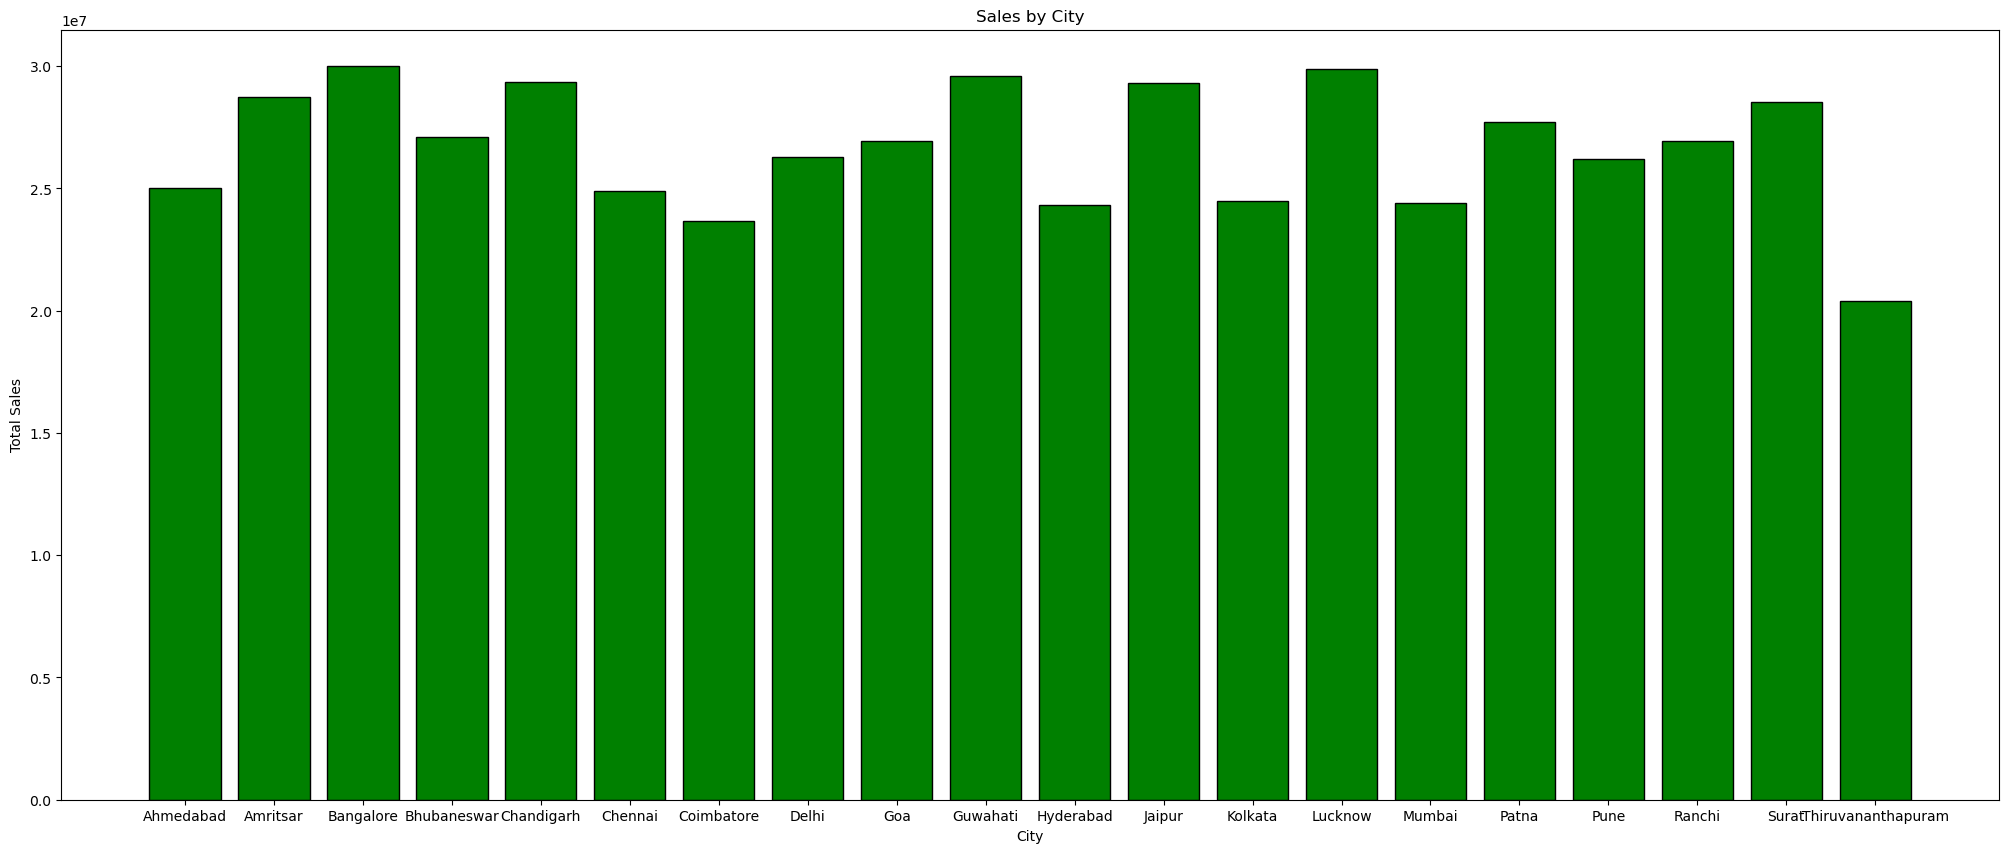

In [54]:
# By city

import matplotlib.pyplot as plt

city_sales = df.groupby('City')['Sales'].sum().reset_index()

plt.figure(figsize=(25,10))
plt.bar(city_sales['City'],city_sales['Sales'],color='green',edgecolor='black')
plt.title("Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()


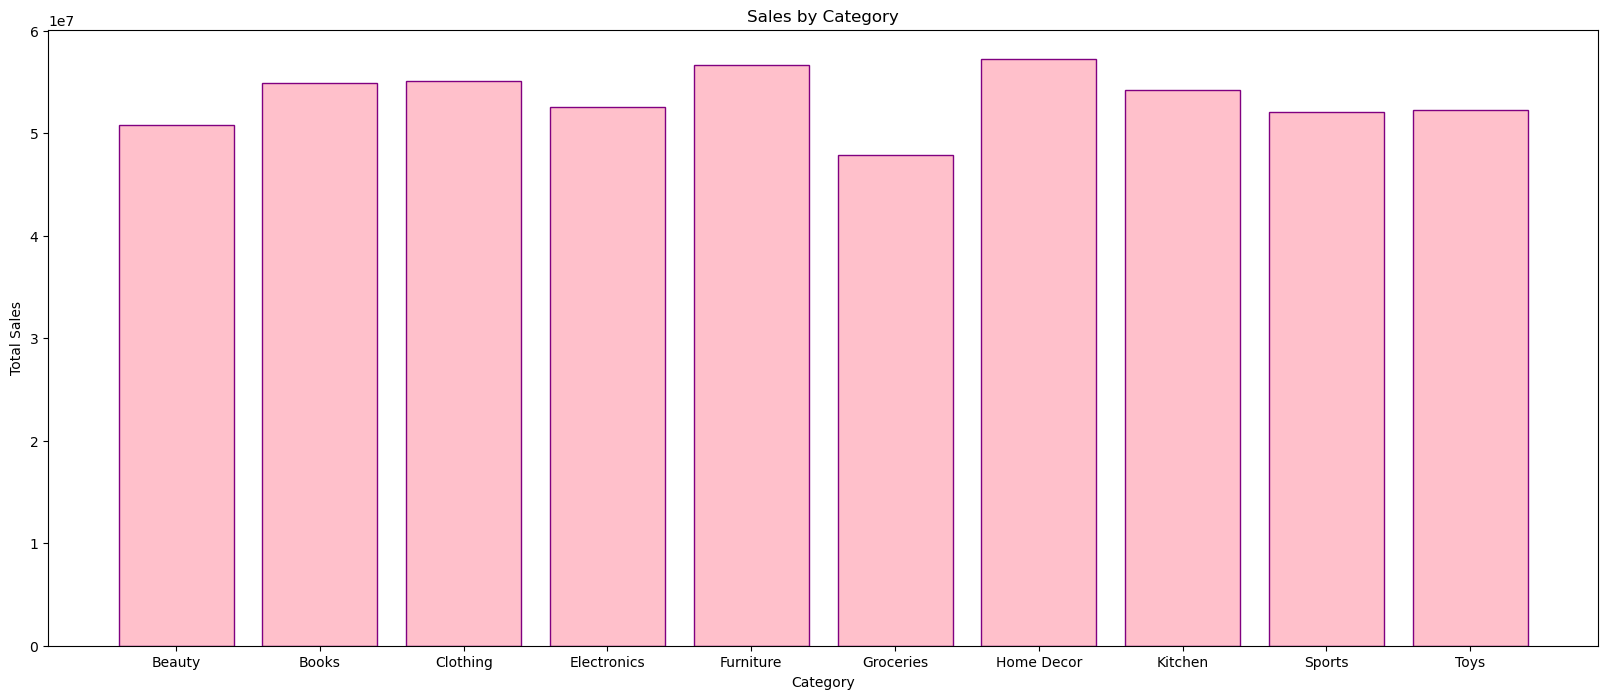

In [55]:
# By Category and Region

import matplotlib.pyplot as plt

category_sales = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(20,8))
plt.bar(category_sales['Category'],category_sales['Sales'],color='pink',edgecolor='purple')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

In [56]:
# show overall dataset

print(df)

      Order_ID Order_Date      Customer_Name Region       City     Category  \
0        10001 2024-10-19       Kashvi Varty  South  Bangalore        Books   
1        10002 2025-08-30        Advik Desai  North      Delhi    Groceries   
2        10003 2023-11-04         Rhea Kalla   East      Patna      Kitchen   
3        10004 2025-05-23          Anika Sen   East    Kolkata    Groceries   
4        10005 2025-01-19        Akarsh Kaul   West       Pune     Clothing   
...        ...        ...                ...    ...        ...          ...   
4995     14996 2024-06-25   Nishith Kulkarni   East    Kolkata        Books   
4996     14997 2024-12-22      Aaina Chander  North     Jaipur         Toys   
4997     14998 2025-04-15       Dhanush Gara  South  Bangalore       Beauty   
4998     14999 2024-07-08  Divyansh Malhotra   East    Kolkata  Electronics   
4999     15000 2024-02-04       Aarush Walla   West        Goa     Clothing   

     Sub_Category         Product_Name  Quantity  U